# Mini-Batch Gradient Descent (MBGD)

## Theoretical Approach

Mini-Batch Gradient Descent acts as a compromise between Batch Gradient Descent and Stochastic Gradient Descent. Instead of using the full dataset or a single sample, it partitions the training data into **mini-batches of size** $B$. The model computes the gradient and updates its parameters after processing each batch. This approach leverages the computational efficiency of matrix operations (like BGD) while providing the frequent updates and convergence speed of stochastic methods.

## Mathematical Formulation

### 1. Mini-Batch Cost Function
For a specific mini-batch $\mathcal{B}$ containing $B$ samples, the cost function is the average loss over that specific subset:

$$
J_{\mathcal{B}}(\theta) = \frac{1}{B} \sum_{k=1}^{B} \mathcal{L}(\hat{y}^{(k)}, y^{(k)})
$$

### 2. The Mini-Batch Gradient
The gradient is estimated by averaging the partial derivatives over the current mini-batch samples. This provides an approximation of the true gradient that is more stable than SGD but less computationally expensive than BGD:

$$
\nabla_\theta J(\theta) \approx \frac{1}{B} \sum_{k=1}^{B} \nabla_\theta \mathcal{L}(\hat{y}^{(k)}, y^{(k)})
$$

### Libraries Import

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Initial Configuration

In [16]:
# Defining target function for approximation
target_function = lambda x: np.sin(x)

# Data generation
domain_start = 0.0
domain_end = 4 * np.pi
sample_size = 200

# Network hyperparameters
hidden_neurons = 32
learning_rate = 0.03
batch_size = 32
intermediate_generations = 50000
total_generations = 200000

# Activation function
activation_function = "sigmoid"

# Matplotlib setup
plt.style.use("ggplot")
%matplotlib inline

# Seed for Reproducibility
np.random.seed(42)

### Activation Functions

In [17]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    s = sigmoid(x)
    return s * (1 - s)

# Tanh
def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - np.tanh(x)**2

# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

# Function dictionary
activations ={"sigmoid": (sigmoid, sigmoid_d), "tanh": (tanh, tanh_d), "relu": (relu, relu_d)}

selected_activation, selected_derivative = activations[activation_function]

### Visualizing Target Function

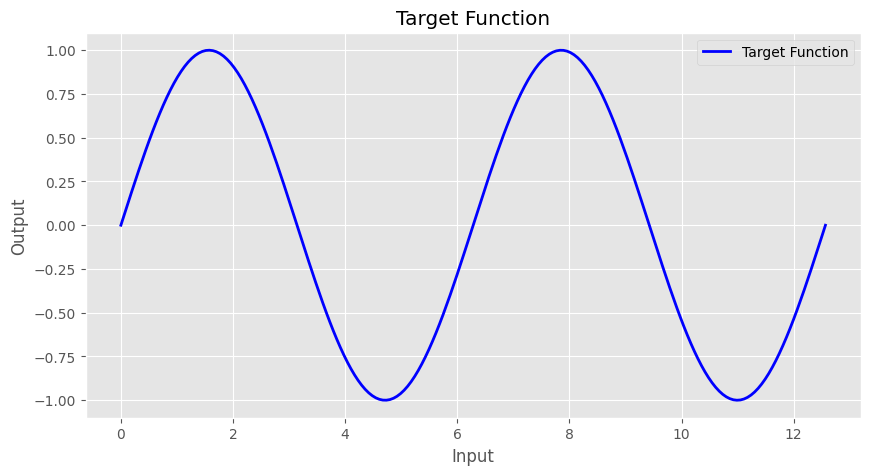

In [18]:
# Generation of vertical input vector
X = np.linspace(domain_start, domain_end, sample_size).reshape(-1, 1)

# Generation of horizontal target vector
Y = target_function(X)

# Plotting the target function
plt.figure(figsize=(10, 5))
plt.plot(X, Y, label="Target Function", color="blue", linewidth=2)
plt.title("Target Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

### Neural Network via Mini-Batch Gradient Descent

In [19]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr, act_func, act_deriv):
        self.lr = lr
        self.act_func = act_func
        self.act_deriv = act_deriv

        # Initializing weights and with small values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1

        # Initializing biases with zeros
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Input Layer -> Hidden Layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.act_func(self.z1)

        # Hidden Layer -> Output Layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, output):
        # Defining the error
        error = output - y

        # Gradient for output layer
        d_output = error * 1

        dW2 = np.dot(self.a1.T, d_output) / batch_size
        db2 = np.sum(d_output, axis=0, keepdims=True) / batch_size

        # Gradient for hidden layer
        d_hidden = np.dot(d_output, self.W2.T) * self.act_deriv(self.z1)

        dW1 = np.dot(X.T, d_hidden) / batch_size
        db1 = np.sum(d_hidden, axis=0, keepdims=True) / batch_size

        # Gradient descent step
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        # Mean squared error
        return np.mean(np.square(error))

### Model Training

In [20]:
# Model Instantiation
model = NeuralNetwork(input_size=1, hidden_size=hidden_neurons, output_size=1, lr=learning_rate, act_func=selected_activation, act_deriv=selected_derivative)

loss_history = []

# Intermediate Training
print(f"Training for {intermediate_generations} generations...")
for i in range(intermediate_generations):
    # Selection of random batch
    random_indices = np.random.choice(sample_size, size=batch_size, replace=False)
    X_batch = X[random_indices]
    Y_batch = Y[random_indices]

    # Forward pass
    prediction = model.forward(X_batch)

    # Backward pass
    loss = model.backward(X_batch, Y_batch, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 10000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Intermediate Prediction
print("Intermediate Training Complete.")
prediction_intermediate = model.forward(X)

# Final Training
remaining_generations = total_generations - intermediate_generations
print(f"Training for further {remaining_generations} generations...")

for i in range(remaining_generations):
    # Selection of random batch
    random_indices = np.random.choice(sample_size, size=batch_size, replace=False)
    X_batch = X[random_indices]
    Y_batch = Y[random_indices]

    # Forward pass
    prediction = model.forward(X_batch)

    # Backward pass
    loss = model.backward(X_batch, Y_batch, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 10000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Final Prediction (Visualize on full dataset)
prediction_final = model.forward(X)
print("Training Complete.")

Training for 50000 generations...
Current Loss: 0.57498
Current Loss: 0.52618
Current Loss: 0.33083
Current Loss: 0.21186
Current Loss: 0.18391
Intermediate Training Complete.
Training for further 150000 generations...
Current Loss: 0.11548
Current Loss: 0.07671
Current Loss: 0.04122
Current Loss: 0.10077
Current Loss: 0.06088
Current Loss: 0.06854
Current Loss: 0.04238
Current Loss: 0.05572
Current Loss: 0.05530
Current Loss: 0.06472
Current Loss: 0.04289
Current Loss: 0.04203
Current Loss: 0.06352
Current Loss: 0.04943
Current Loss: 0.02946
Training Complete.


### Visualizing Approximation

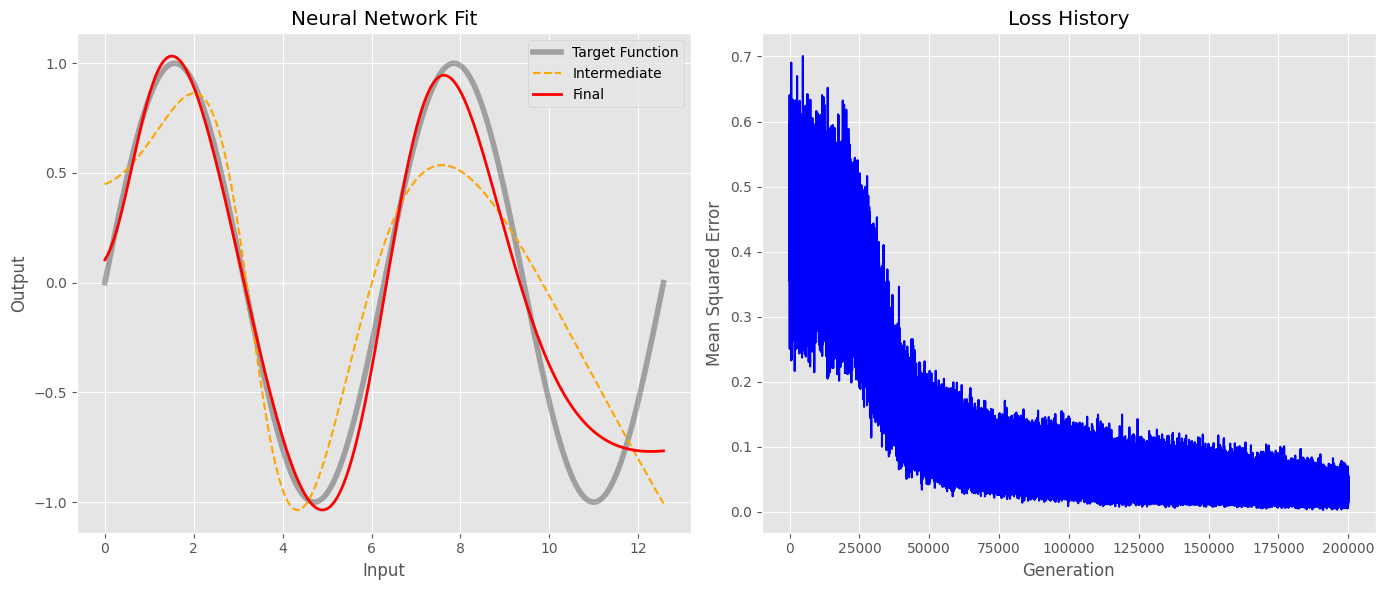

In [21]:
plt.figure(figsize=(14, 6))

# Plotting the function approximation
plt.subplot(1, 2, 1)
plt.plot(X, Y, label="Target Function", color="black", alpha=0.3, linewidth=4)
plt.plot(X, prediction_intermediate, label="Intermediate", color="orange", linestyle="--")
plt.plot(X, prediction_final, label="Final", color="red", linewidth=2)
plt.title("Neural Network Fit")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()

# Plotting the learning curve
plt.subplot(1, 2, 2)
plt.plot(loss_history, color="blue")
plt.title("Loss History")
plt.xlabel("Generation")
plt.ylabel("Mean Squared Error")
#plt.yscale("log")

plt.tight_layout()
plt.show()